# 4TIN811U Machine Learning & Deep Learning
# Cours/TP 11 - Convolutions et réseaux de neurones convolutionnels

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as signal

## Convolutions et feature extraction

On considère une image, sur laquelle nous allons étudier l'effet de plusieurs filtres de convolution différents pour "extraire des caractéristiques" (*feature extraction*) de l'image.

(404, 859, 3)
uint8


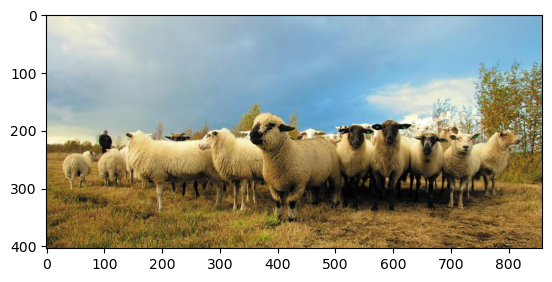

In [2]:
image = mpl.image.imread("./sheep.jpg")
plt.imshow(image)
print(image.shape)
print(image.dtype)

L'image a trois dimensions car elle est en couleurs. Les deux premières dimensions représentent respectivement la hauteur et la largeur de l'image, et la troisième dimension peut prendre trois valeurs différentes, une pour chaque "channel" de couleurs (dans l'ordre rouge, vert, bleu). Par exemple, pour afficher la composante bleue, on peut utiliser le code suivant.

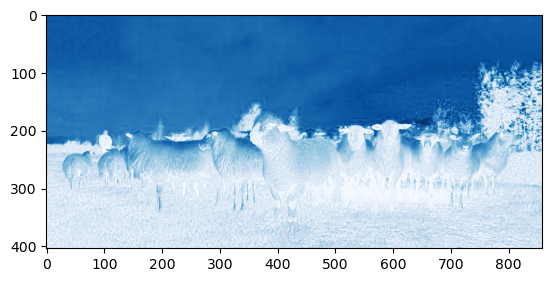

In [3]:
plt.imshow(image[:,:,2], cmap="Blues")

Nous allons définir six filtres de convolution différents. Pour chacun,
- expliquez l'effet du filtre sur l'image,
- expliquez pourquoi il a cet effet à partir de la valeur des poids dans le filtre.

On utilise le mode de *padding* `"same"`, donc l'image retournée a la même dimension que l'image originale.

(404, 859, 3)


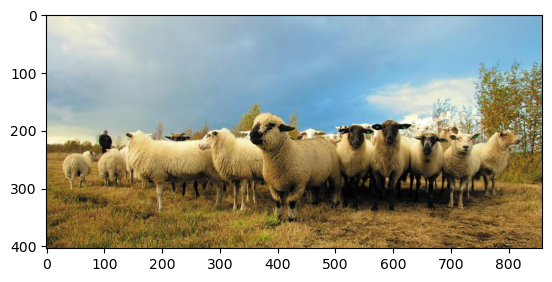

In [10]:
filter1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
filter1 = filter1[:,:,None] # Rajoute une troisième dimension, nécessaire pour que scipy l'applique sur une image à 3 dimensions.
conv = signal.convolve(image, filter1, mode="same")
print(conv.shape)
plt.imshow(conv)

*Réponse pour `filter1` :* il ne fait rien car on a 1 au milieu du filtre et le reste a 0, ce qui fait lorsqu'on parcoure l'image ceci vient a faire newPixel = 0 +pixel*1+0

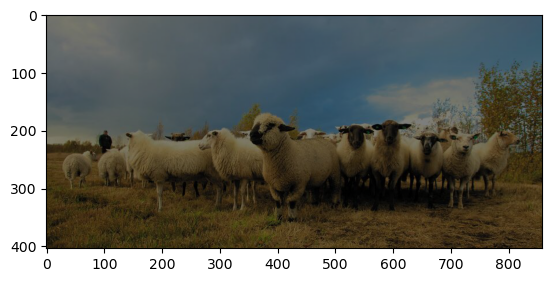

In [11]:
filter2 = np.array([[0, 0, 0], [0, .5, 0], [0, 0, 0]])
filter2 = filter2[:,:,None]
conv = signal.convolve(image, filter2, mode="same").astype(int)
plt.imshow(conv)

*Réponse pour `filter2` :* Idem que le filtre 1 sauf on diminue de 50 % la valeur du pixel du milieu

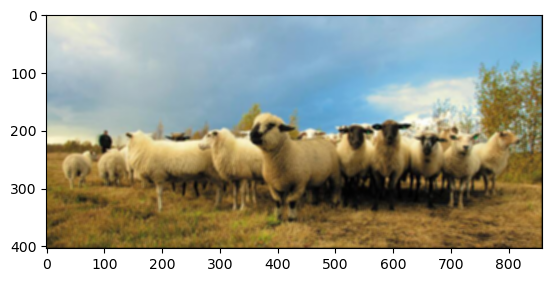

In [12]:
filter3 = 1./25. * np.ones((5, 5))
filter3 = filter3[:,:,None]
conv = signal.convolve(image, filter3, mode="same").astype(int)
plt.imshow(conv)

*Réponse pour `filter3` :* On pixelise l'image, tel que newPixel = 0.25*pixel1+0.25*pixel2+0.25*pixel3+0.25*pixel4+0.25*pixel5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


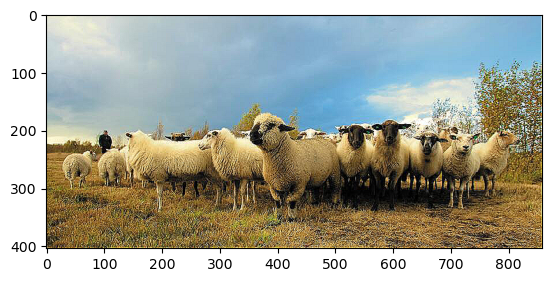

In [7]:
filter4 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
filter4 = filter4[:,:,None]
conv = signal.convolve(image, filter4, mode="same")
plt.imshow(conv)

*Réponse pour `filter4` :* On augmente le constraste de l'image

*Expliquez le warning "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)" qui s'affiche dans ce cas-ci, et pourquoi il ne s'affichait pas dans les autres cas :* 
Car avant on ne pouvait pas avoir de valeurs négative

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


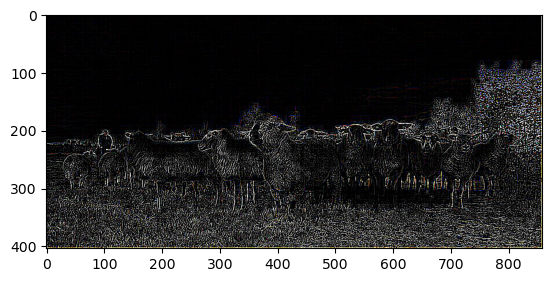

In [8]:
filter5 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
filter5 = filter5[:,:,None]
conv = signal.convolve(image, filter5, mode="same")
plt.imshow(conv)

*Réponse pour `filter5` :* On garde que les coutoures des objects présents sur l'image en mettant en evidence les changement brutaut, notamment via le 8 au milieu.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


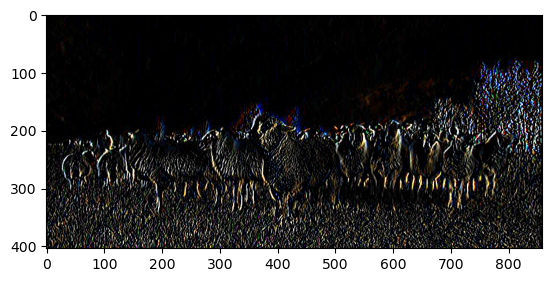

In [9]:
filter6 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) # Sobel filter
filter6 = filter6[:,:,None]
conv = signal.convolve(image, filter6, mode="same")
plt.imshow(conv)

*Réponse pour `filter6` :* Calcule les coutours des axes horizontaux. 

## Fin du cours sur les réseaux convolutionnels : Arguments supplémentaires pour la fonction convolution

Pour définir des réseaux de neurones convolutionnels, nous allons utiliser la couche [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html). Discutons des paramètres les plus importants :
- `in_channels` est le nombre de *channels* d'entrée, qui correspond au nombre de tableaux $2$-dimensionnels utilisés pour décrire une image : par exemple, $3$ pour une image en couleurs et $1$ pour une image en noir et blanc.
- `out_channels` décrit le nombre de convolutions à effectuer ; chaque convolution retourne un tableau $2$-dimensionnel, donc cela correspond au nombre d'images utilisées dans la couche suivante du réseau de neurones. Le but est que chaque convolution permette d'extraire une caractéristique de l'image, et plusieurs caractéristiques différentes seront ensuite combinées dans les couches suivantes. Au plus on choisit une grande valeur, au plus le réseau apprendra de filtres différents.
- `kernel_size` : les dimensions du filtre (dans les exemples ci-dessus, les filtres ont dimension `(3, 3)` ou `(5, 5)`). Les filtres sont automatiquement étendus dans une troisième dimension selon le nombre de `in_channels`.
- `stride` : Correspond au nombre de pixels parcourus par le filtre à chaque "pas" ; dans la définition de convolution vue au cours, on a supposé que la *stride* était de $1$ (ce qui est la valeur par défaut). Cela est illustré sur l'image suivante ([source des images](https://makeyourownneuralnetwork.blogspot.com/2020/02/calculating-output-size-of-convolutions.html)). La stride influence beaucoup la taille de l'image résultante ; une stride de $s$ divise par $s$ le nombre de pixels selon chaque dimension.

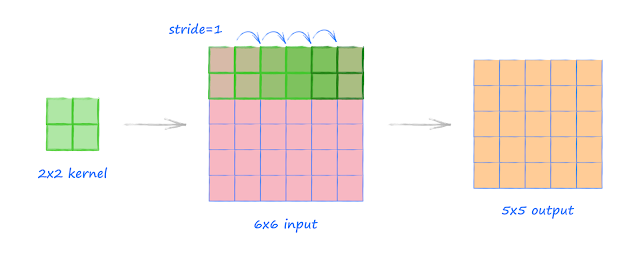
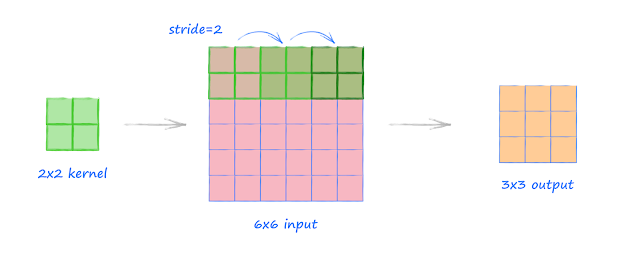
- `padding` : nous avons vu au cours le paramètre *padding* quand on utilise une convolution, qui change la façon dont sont traités les bords des images et influence légèrement la taille de l'image résultante.

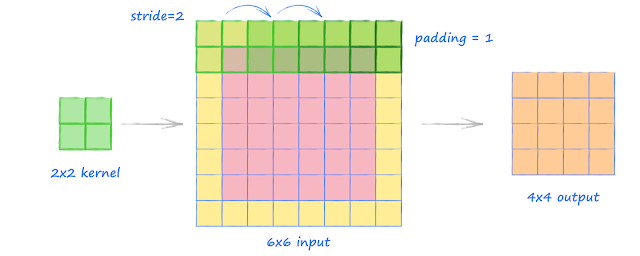

## Fin du cours sur les réseaux convolutionnels : couches MaxPool et Flatten

Il reste un problème que nous n'avons pas abordé au cours : nous avons dit que traiter une image avec une couche linéaire classique résultait en un nombre de paramètres très grand. Toutefois, même dans un réseau de neurones convolutionnel, il est nécessaire de déboucher sur une couche avec $C$ neurones de sortie, où $C$ est le nombre de classes possibles. Au moins pour la dernière couche, cela nécessite a priori une couche de type `Linear`.

Pour remédier à cela, il existe plusieurs techniques dites de *réduction de dimensionnalité*. La plus fréquente dans le cas d'analyse d'images est d'intercaler dans les réseaux des couches *MaxPool* (en `torch`, [nn.MaxPool2d()](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)). Celles-ci découpent l'image en petits carrés de côté $\ge 2$, et ne conservent dans chaque carré que la valeur la plus grande. Cela est illustré sur l'image suivante (pour des petits carrés de taille $2$) :

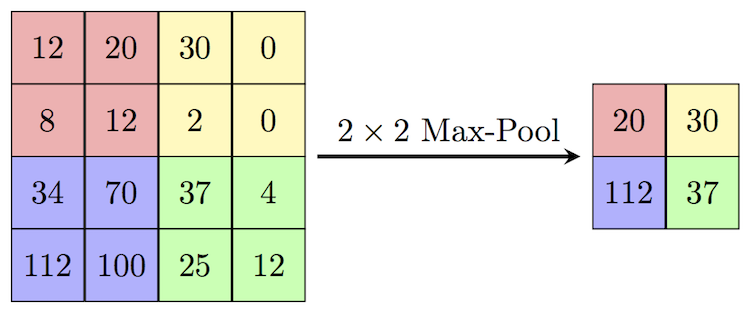

[Source de l'image](https://computersciencewiki.org/index.php?title=Max-pooling_/_Pooling)

On considère toujours un paramètre `kernel_size` pour la taille du "carré" et un paramètre `stride` pour la taille du "pas". Dans l'image ci-dessus, `kernel_size` vaut $2$ et `stride` vaut $2$. 

MaxPool permet de réduire la taille des tableaux manipulés, au prix d'une perte d'information. L'intuition est que, malgré cette perte d'information, l'information "importante" représentée par les valeurs élevées est conservée. Donc, si une feature avait été détectée par une convolution dans une image (ce qui est représenté par une valeur élevée), une couche MaxPool devrait "conserver" cette information. De plus, appliquer une convolution à la suite d'un MaxPool implique que la convolution "touche" des pixels qui étaient plus éloignés dans l'image initiale. Une couche MaxPool permet de diminuer la dimensionnalité d'une image, et d'augmenter "la dimensionnalité d'une convolution".

En pratique, après réduction de la dimensionnalité de votre input, pour utiliser une couche `Linear` en fin de réseau (qui requiert un vecteur en entrée), vous pouvez utiliser une couche [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html), qui recopie simplement les valeurs de n'importe quel tableau multi-dimensionnel en un vecteur. La couche `nn.Flatten()` n'a évidemment pas de paramètre entraînable.

## Classification d'images avec un réseau de neurones convolutionnels

Nous considérons le dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), qui contient $50000$ images en couleurs de dimension $32 \times 32$ contenant chacune l'un des $10$ éléments suivants : *airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks* (il y a exactement $5000$ images pour chaque classe).

In [13]:
import torch
import torch.nn as nn
import torchvision

# Si erreur sur les ordinateurs du CREMI : télécharger le dataset en exécutant un fichier .py avec juste la ligne suivante
# dans le même dossier, et puis retirer le "download=True" du notebook.
# Si le téléchargement prend trop de temps, vous pouvez demander à l'enseignant de vous transférer les fichiers sur clé USB.
dataset = torchvision.datasets.CIFAR10(root='./', train=True, download=True)
# Utiliser "train=False" permet de télécharger 10000 autres images, mais on se contentera des 50000 images ici.

100%|████████████████████████| 170498071/170498071 [02:13<00:00, 1276095.90it/s]


Extracting ./cifar-10-python.tar.gz to ./


In [14]:
X_dataset = dataset.data
y = torch.tensor(dataset.targets)
print(X_dataset.shape)
print(y.shape)

# Les classes d'objets dans l'ordre dans lequel elles sont stockées dans `y`
# (par exemple, y[0] == 6 signifie que la première image est une grenouille).
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

(50000, 32, 32, 3)
torch.Size([50000])


frog


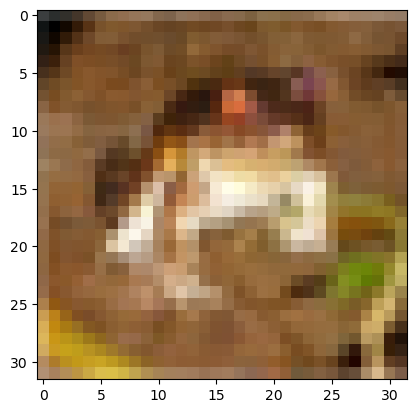

In [15]:
print(classes[y[0]])
plt.imshow(X_dataset[0].reshape(32,32,3))

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Torch souhaite recevoir une image au format "channels-first", c'est-à-dire avec la dimension
# des couleurs en premier. La fonction suivante permet d'inverser l'ordre des dimensions : on garde
# la dimension "exemples" en première, puis on met la dimension "channels", et puis les dimensions hauteur/largeur
X = torch.tensor(X_dataset).permute(0, 3, 1, 2)
# Normalisation
X = X.to(torch.float32) / 255. - 0.5
# Cette fois-ci, on ne redimensionne pas `X` comme un vecteur : le réseau de neurones convolutionnels
# va directement traiter X comme une image à deux dimensions.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=.5)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

torch.Size([40000, 3, 32, 32]) torch.Size([40000])
torch.Size([5000, 3, 32, 32]) torch.Size([5000])
torch.Size([5000, 3, 32, 32]) torch.Size([5000])


On vous propose le réseau de neurones convolutionnel suivant.

In [20]:
# Réseau de neurones convolutionnel repris de https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
def cnn():
    model = nn.Sequential(
        nn.Conv2d(3, 6, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10),
        nn.LogSoftmax(dim=1) # Compatible avec la fonction de loss nn.NLLLoss()
    )
    print(model)
    return model

model = cnn()
# Nous ne rediscutons pas ici du choix de la fonction de loss ; se référer au TP précédent pour davantage de commentaires à ce sujet.
loss_function = nn.NLLLoss()

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)


Quelle est la taille d'un channel (faites attention au padding par défaut utilisé par `Conv2d`)
- avant la première convolution ? *Réponse :* 3
- après la première convolution ? *Réponse :* 6
- après le premier MaxPool ? *Réponse :* 6
- après la seconde convolution ? *Réponse :* 16
- après le second MaxPool ? *Réponse :* 16

Cela est-il cohérent avec le nombre d'entrées dans la première couche Linear ?
*Réponse :* 
oui car il faut mutiplier car par la taille de l'image 5 par 5 a la fin des deux max pooling et du stride qui décale.

In [25]:
!pip install torch-summary

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/holehe-1.61-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [27]:
from torchsummary import summary
input_size = (3, 32, 32) 

summary(model, input_size)

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─ReLU: 1-2                              [-1, 6, 28, 28]           --
├─MaxPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─ReLU: 1-5                              [-1, 16, 10, 10]          --
├─MaxPool2d: 1-6                         [-1, 16, 5, 5]            --
├─Flatten: 1-7                           [-1, 400]                 --
├─Linear: 1-8                            [-1, 120]                 48,120
├─ReLU: 1-9                              [-1, 120]                 --
├─Linear: 1-10                           [-1, 84]                  10,164
├─ReLU: 1-11                             [-1, 84]                  --
├─Linear: 1-12                           [-1, 10]                  850
├─LogSoftmax: 1-13                       [-1, 10]                  --
To

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─ReLU: 1-2                              [-1, 6, 28, 28]           --
├─MaxPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─ReLU: 1-5                              [-1, 16, 10, 10]          --
├─MaxPool2d: 1-6                         [-1, 16, 5, 5]            --
├─Flatten: 1-7                           [-1, 400]                 --
├─Linear: 1-8                            [-1, 120]                 48,120
├─ReLU: 1-9                              [-1, 120]                 --
├─Linear: 1-10                           [-1, 84]                  10,164
├─ReLU: 1-11                             [-1, 84]                  --
├─Linear: 1-12                           [-1, 10]                  850
├─LogSoftmax: 1-13                       [-1, 10]                  --
To

Calculez le nombre de paramètres (poids et biais) entraînables pour chaque couche de ce réseau. Comparez vos résultats au nombre de paramètres qui auraient été utilisés si on avait utilisé une seule couche `Linear` avec $100$ neurones appliquée directement sur l'input.

*Réponse :*
conv1: (5 * 5 * 3 * 6) + 6 = 456
conv2: (5 * 5 * 6 * 16) + 16 = 2,416
Linear1: (16 * 5 * 5 * 120) + 120 = 48,120
Linear2: (120 * 84) + 84 = 10,164
Linear3:  (84 * 10) + 10 = 850

In [28]:
# Indice : après avoir fait les détails du calcul, vous pouvez *vérifier* votre réponse avec :
sum(p.numel() for p in model.parameters() if p.requires_grad)

62006

On redéfinit maintenant une fonction d'entraînement.

In [29]:
def accuracy(model, X, y):
    '''Retourne l'accuracy du réseau `model` sur les données $(X, y)$.'''
    y_pred = model(X)
    accuracy = (torch.argmax(y_pred, dim=1) == y).float().mean()
    return accuracy

# Fonction d'entraînement modifiée à partir de celle du TP 9.
def train_cifar10(model, nb_epoch=2, batch_size=50, samples_used=None):
    samples_used = samples_used if samples_used else len(X_train)
    loss_train = []
    loss_val = []
    
    optimizer = optim.Adam(model.parameters())
    for k in range(nb_epoch):
        for i in range(0, samples_used, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_pred = model(X_batch)
            y_batch = y_train[i:i+batch_size]
            # On calcule l'erreur
            loss = loss_function(y_pred, y_batch)
            # On réinitialise les gradients dans l'optimizer
            optimizer.zero_grad()
            # Algorithme de backpropagation pour calculer les gradients
            loss.backward()
            # On met à jour les paramètres avec l'optimizer
            optimizer.step()

        with torch.no_grad(): # Permet à torch de ne pas préparer le calcul des gradients, ce qui est un peu plus efficace.
            loss_train.append(float(loss))
            loss_val.append(float(loss_function(model(X_val), y_val)))
            
        print(f"Itération {k} terminée, loss = {loss}.")

    with torch.no_grad():
        print("Accuracy sur l'ensemble d'entraînement :", accuracy(model, X_train[:samples_used], y_train[:samples_used]))
        print("Accuracy sur l'ensemble de validation :", accuracy(model, X_val, y_val))
    return loss_train, loss_val

On entraîne le modèle ; vous devriez obtenir une accuracy $\approx 50 \%$ avec $2$ epochs.

In [30]:
%%time
model = cnn()
loss_train, loss_val = train_cifar10(model, nb_epoch=2)
with torch.no_grad():
    print("Accuracy sur l'ensemble de test :", accuracy(model, X_test, y_test))

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
Itération 0 terminée, loss = 1.4935134649276733.
Itération 1 terminée, loss = 1.4063338041305542.
Accuracy sur l'ensemble d'entraînement : tensor(0.4921)
Accuracy sur l'ensemble de validation : tensor(0.4834)
Accuracy sur l'ensemble de test : tensor(0.4816)
CPU times: user 26.3 s, sys: 12.4 s, total: 38.7 s
Wall time: 18.9 s


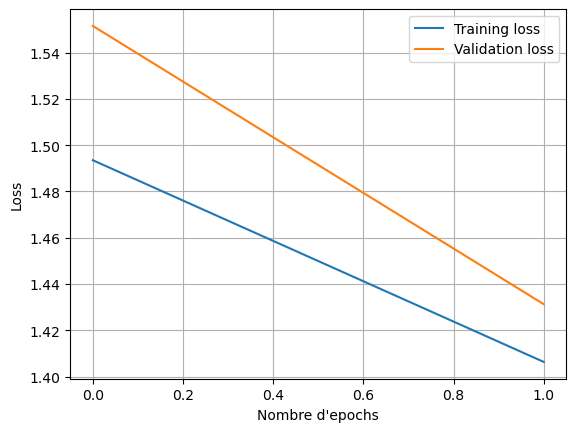

In [31]:
def plot_losses(loss_train, loss_val):
    plt.figure()
    plt.plot(loss_train, '-', label="Training loss")
    plt.plot(loss_val, '-', label="Validation loss")
    plt.legend()
    plt.grid()
    plt.xlabel("Nombre d'epochs")
    plt.ylabel("Loss")
    plt.show()

plot_losses(loss_train, loss_val)

Après entraînement de vos données, vous pouvez sauvegarder les paramètres appris. Cela vous évite de réentraîner le modèle à chaque fois que vous voulez l'utiliser.

In [32]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

*Note :* L'accuracy obtenue peut paraître faible, mais cela est déjà significativement mieux que le hasard (qui donnerait des résultats d'environ $10 \%$), et la tâche est significativement plus complexe à réaliser que pour le dataset MNIST. Des réseaux plus grands et plus complexes (par exemple, [InceptionV3](https://cloud.google.com/tpu/docs/inception-v3-advanced?hl=fr)), peuvent obtenir des résultats $> 95 \%$, mais l'architecture (non-séquentielle) de ces réseaux dépasse le cadre de ce cours et sera vue au cours *Architectures avancées de réseaux de neurones* l'an prochain. De plus, le temps d'entraînement d'un tel réseau est déraisonnable pour un tel TP.

Comparez vos résultats à un réseau non-convolutionnel (avec des couches `Linear`) qui aurait un nombre de paramètres similaire au réseau de neurones convolutionnels plus haut. Pour ne pas vous embêter à redimensionner vos images d'entrée en vecteurs, vous pouvez commencer votre réseau par une couche `nn.Flatten()`. 

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=20, bias=True)
  (2): ReLU()
  (3): Linear(in_features=20, out_features=10, bias=True)
  (4): LogSoftmax(dim=1)
)
Itération 0 terminée, loss = 1.8632636070251465.
Itération 1 terminée, loss = 1.808623194694519.
Itération 2 terminée, loss = 1.7846287488937378.
Itération 3 terminée, loss = 1.758650779724121.
Itération 4 terminée, loss = 1.7374376058578491.
Itération 5 terminée, loss = 1.722524881362915.
Itération 6 terminée, loss = 1.705734372138977.
Itération 7 terminée, loss = 1.6756751537322998.
Itération 8 terminée, loss = 1.6829510927200317.
Itération 9 terminée, loss = 1.6764171123504639.
Itération 10 terminée, loss = 1.6763235330581665.
Itération 11 terminée, loss = 1.6800636053085327.
Itération 12 terminée, loss = 1.6836613416671753.
Itération 13 terminée, loss = 1.6645578145980835.
Itération 14 terminée, loss = 1.6526304483413696.
Itération 15 terminée, loss = 1.6612581014633179.
Ité

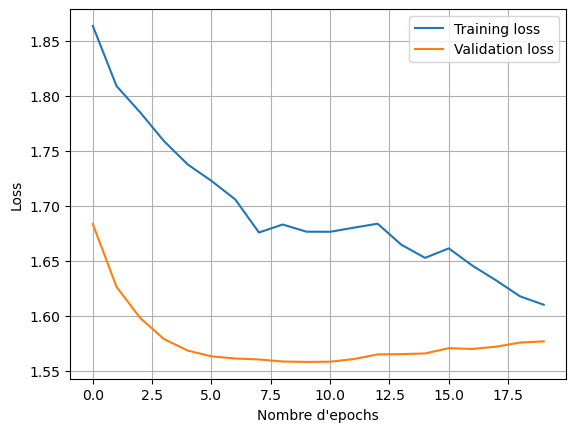

CPU times: user 6.83 s, sys: 3.01 s, total: 9.84 s
Wall time: 8.72 s


In [37]:
%%time
model_non_cnn = nn.Sequential(
        nn.Flatten(),
        nn.Linear(3*32*32,20),
        nn.ReLU(),
        nn.Linear(20,10),
        nn.LogSoftmax(dim=1) # Compatible avec la fonction de loss nn.NLLLoss()
    )
print(model_non_cnn)

loss_train, loss_val = train_cifar10(model_non_cnn, nb_epoch=20)
print("Accuracy sur l'ensemble de validation :", accuracy(model_non_cnn, X_val, y_val))
plot_losses(loss_train, loss_val)

*Réponse (expliquez les différences/avantages de chaque type de réseau) :*
Convolution permet de mieux distinguer les images spécifiter des images, ainsi il est plus rapide, cependant il est plus suceptible a faire de l'overfitting avec plusieurs filtre qui font la meme chose. 
Flatten va uniquement faire une sorte de regression lineaire sur les images, ainsi les gradients auront la forme des images
Alors que convolution va extraires chaque carracteristque de l'image puis faire une sorte de régression lineaire


## Augmentation des données

Une statistique qui peut se révéler utile est de déterminer quelles sont les classes que le réseau prédit bien, et quelles sont les classes que le réseau prédit mal. Pour cela, dénombrez
- les pourcentages de prédictions correctes : pour chaque classe, quel est le nombre de d'éléments de cette classe qui ont été bien classifiés ?
- les pourcentages de faux positifs : pour chaque classe, quel est le pourcentage des éléments mal catégorisés qui ont été catégorisés dans cette classe ?

In [44]:
# On recharge les poids de notre CNN pour ne pas devoir le réentraîner
model = cnn()
model.load_state_dict(torch.load(PATH))

classes = ('un', 'deux', 'trois', 'quatre', 'cinq','six','sept','huit','neuf', 'dix')

def printScoreClasse(classes, X, y, batch_size=50):
    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    false_positives = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            y_pred = model(X_batch)
            _, predictions = torch.max(y_pred, 1)
            # collect the correct predictions and false positives for each class
            for label, prediction in zip(y_batch, predictions):
                if label == prediction:
                    correct_pred[classes[label.item()]] += 1
                else :
                    false_positives[classes[prediction.item()]] += 1
                total_pred[classes[label.item()]] += 1

    # print accuracy and false positive rate for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        false_positive_rate = 100 * float(false_positives[classname]) / total_pred[classname]
        print(f'Accuracy for class: {classname:7s}       is {accuracy:.1f} %')
        print(f'False positive for class: {classname:7s} is {false_positive_rate:.1f} %')

# Utilisation de la fonction pour imprimer la précision pour chaque classe
printScoreClasse(classes, X_val, y_val)


Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
Accuracy for class: un            is 63.9 %
False positive for class: un      is 66.5 %
Accuracy for class: deux          is 64.9 %
False positive for class: deux    is 40.4 %
Accuracy for class: trois         is 16.2 %
False positive for class: trois   is 19.9 %
Accuracy for class: quatre        is 10.7 %
False positive for class: quatre  is 25.0 %
Accuracy for class: cinq          is 55.6 %
False positive

Lors de mon exécution, le réseau avait particulièrement du mal avec les chats et les oiseaux ; ce genre de statistiques peut indiquer quelles données supplémentaires sont les plus pertinentes pour améliorer la qualité des prédictions. Les faux positifs apportent aussi de l'information : certes, les chevaux sont particulièrement bien classifiés, mais ce sont aussi les plus souvent prédits à tort.

Une technique fréquente pour améliorer les prédictions à partir d'un dataset fixé est d'*augmenter* le dataset artificiellement en y ajoutant les mêmes images avec des transformations préservant leur classe ; par exemple, une rotation de l'image, une symétrie orthogonale horizontale ou verticale...

PyTorch peut gérer ce type de modification automatiquement, en utilisant un `DataLoader` avec des éléments de `torchvision.transforms`.
On vous montre ici une façon d'entraîner votre réseau en utilisant davantage les possibilités de `torch`. Dans le futur, on vous conseille plutôt d'utiliser ce genre de classe qui a beaucoup d'avantages (plus de possibilités et plus efficace en mémoire), plutôt que la division à la main du dataset en batches effectuée plus haut et aux TPs précédents. Assurez-vous de comprendre le but de chaque ligne, en vous référant éventuellement à la documentation. Notez que PyTorch n'augmente pas explicitement la taille du dataset, mais applique des transformations aléatoirement quand les images sont chargées dans un batch !

Une autre chose que PyTorch peut faire est de randomiser l'ordre dans lequel les images sont chargées dans les batches, ce qui permet de réduire l'overfitting.

In [45]:
import torch
import torch.nn as nn
import torchvision.transforms.v2 as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

dataset = torchvision.datasets.CIFAR10(root='./', transform=transform)
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [40000, 5000, 5000])
trainloader = torch.utils.data.DataLoader(dataset, batch_size=50,
                                          shuffle=True) # Cet argument fait en sorte que les exemples sont mélangés à chaque epoch
valloader = torch.utils.data.DataLoader(val_set, batch_size=100, shuffle=False) # Pas nécessaire de shuffler les ensembles de test et de validation
testloader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)

/Users/gabrielmariebrisson/anaconda3/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Users/gabrielmariebrisson/anaconda3/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please sub

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
Epoch 0 terminée, loss = 1.5183343887329102.
Epoch 1 terminée, loss = 0.9748485088348389.
Epoch 2 terminée, loss = 1.1067768335342407.
Epoch 3 terminée, loss = 0.8670861721038818.
Epoch 4 terminée, loss = 1.2892146110534668.


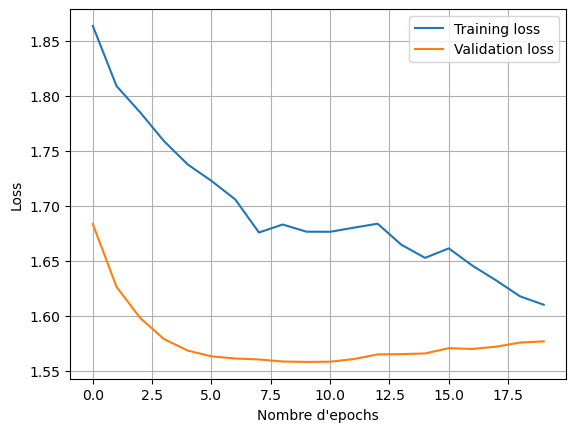

CPU times: user 2min, sys: 41.3 s, total: 2min 41s
Wall time: 1min 48s


In [46]:
%%time
model = cnn()
optimizer = optim.Adam(model.parameters())
nb_epoch = 5

train_loss = []
val_loss = []
# Le code suivant est inspiré de https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
for epoch in range(nb_epoch): # loop over the dataset multiple times
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

    train_loss.append(loss)
    print(f"Epoch {epoch} terminée, loss = {loss}.")

    # Loss de l'ensemble de validation
    with torch.no_grad():
        nb_batches = 0
        loss = 0
        for data in valloader:
            inputs, labels = data
            outputs = model(inputs)
            loss += loss_function(outputs, labels)
            nb_batches += 1

        val_loss.append(loss / nb_batches)

plot_losses(loss_train, loss_val)

In [47]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 5000 validation images: {100 * correct // total} %')

Accuracy of the network on the 5000 validation images: 62 %


Avec le même réseau, comparez les avantages et inconvénients des deux types d'entraînements (celui défini plus haut, sans transformation et avec les exemples toujours dans le même ordre, et celui-ci défini juste au-dessus, avec transformations et shuffling des batches).

*Réponse :* 
En augmentant le dataset, le reseaux va etre plus performant les validations, car il y aura moins de variance, cependant ceci est plus long car il a plus d'images a voir, de plus Si on accumule les transformations, les images peuvent ne plus rien a voir avec le label attendu.
Le suffling des batchs permet d'eviter le reseaux a sadapter a un ordre des batchs données.